In [1]:
from diffusers import StableDiffusionPipeline
from diffusers.schedulers import DPMSolverSinglestepScheduler
import os
import os.path as path

home = os.getenv('HOME')
pipe = StableDiffusionPipeline.from_single_file(path.join(home, 'civitai', 'animatediff', 'majicmixRealistic_v7.safetensors'))
pipe.to('cuda')
pipe.enable_xformers_memory_efficient_attention()
pipe.safety_checker = None

print(pipe.scheduler)

pipe.scheduler = DPMSolverSinglestepScheduler(
  solver_order=2,
  beta_start=0.00085,
  beta_end=0.012
)

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.
/home/kiddos/.pyenv/versions/3.11.4/lib/python3.11/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


PNDMScheduler {
  "_class_name": "PNDMScheduler",
  "_diffusers_version": "0.24.0",
  "beta_end": 0.012,
  "beta_schedule": "scaled_linear",
  "beta_start": 0.00085,
  "clip_sample": false,
  "num_train_timesteps": 1000,
  "prediction_type": "epsilon",
  "set_alpha_to_one": false,
  "skip_prk_steps": true,
  "steps_offset": 1,
  "timestep_spacing": "leading",
  "trained_betas": null
}



Token indices sequence length is longer than the specified maximum sequence length for this model (145 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['looking directly at the viewer with soft black eyes and red lips. she has long black hair and is holding a red lantern. the background contains elegant chinese furniture and decorations. the lighting is warm and soft, creating an elegant and relaxing courtesan house atmosphere. the image has shallow depth of field and is blurred like a classical chinese portrait painting.']


  0%|          | 0/60 [00:00<?, ?it/s]

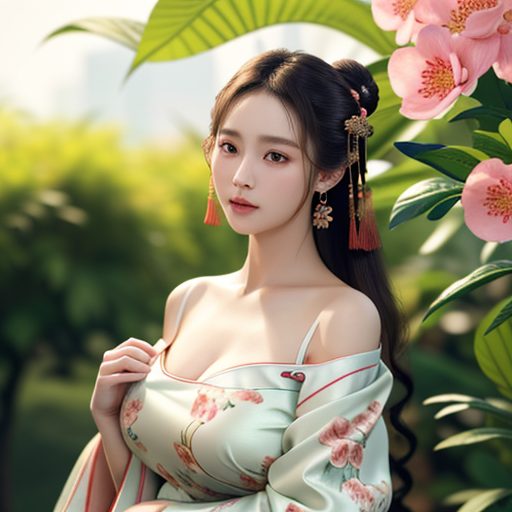

In [2]:
import torch

prompt = 'best quality, masterpiece, illustration, realistic, photo-realistic, amazing, finely detail, incredibly absurdres, huge filesize, ultra-detailed, highres, extremely detailed CG unity 8k wallpaper, nsfw, upper body, A beautiful young Chinese woman with medium-large breasts wearing a floral print off-the-shoulder hanfu outfit with a red tassel hair ornament, looking directly at the viewer with soft black eyes and red lips. She has long black hair and is holding a red lantern. The background contains elegant Chinese furniture and decorations. The lighting is warm and soft, creating an elegant and relaxing courtesan house atmosphere. The image has shallow depth of field and is blurred like a classical Chinese portrait painting.'
negative_prompt = 'easynegative, ng_deepnegative_v1_75t, HDA_BadHands_neg-neg, blurry, text overlay, trademark, brand, copyright, signature, watermark, artist name, artist logo, logo parody, username, markings, jpeg artifacts, abs, muscular, paintings, sketches, (worst quality, low quality, normal quality:1.5), lowres, monochrome, grayscale, skin spots, acnes, skin blemishes, age spot, strabismus, mosaic censoring, blur censor, identity censor, bar censor, censored, convenient censoring, monotone background,'

output = pipe(
  prompt=prompt.strip(),
  negative_prompt=negative_prompt.strip(),
  guidance_scale=12.0,
  num_inference_steps=60,
)
output.images[0]